<a href="https://colab.research.google.com/github/roshnijohnson/Linear-Regression-using-Gradient-Descent/blob/main/part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 6375 Assignment-1 Part-1: Linear Regression using Gradient Descent

Name of students:

Vaibhav Tyagi - VXT200018

Roshni Johnson Nambiaparambil - RXN200022

In [ ]:
# Imported libraries

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# reading dataset from UCI

dataset = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx")
dataset

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
# Checking dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
#  Removing the 'No' column
dataset = dataset.drop('No', 1)
dataset

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
# checking for null values
dataset.isna().sum() 

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [ ]:
# Converting feature 'Transaction date' to type int

dataset['X1 transaction date'] = dataset['X1 transaction date'].astype(int)
dataset

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
# Calculating the Correlation

dataset.corr()["Y house price of unit area"][:-1:].sort_values(ascending=False)

X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X1 transaction date                       0.081545
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64

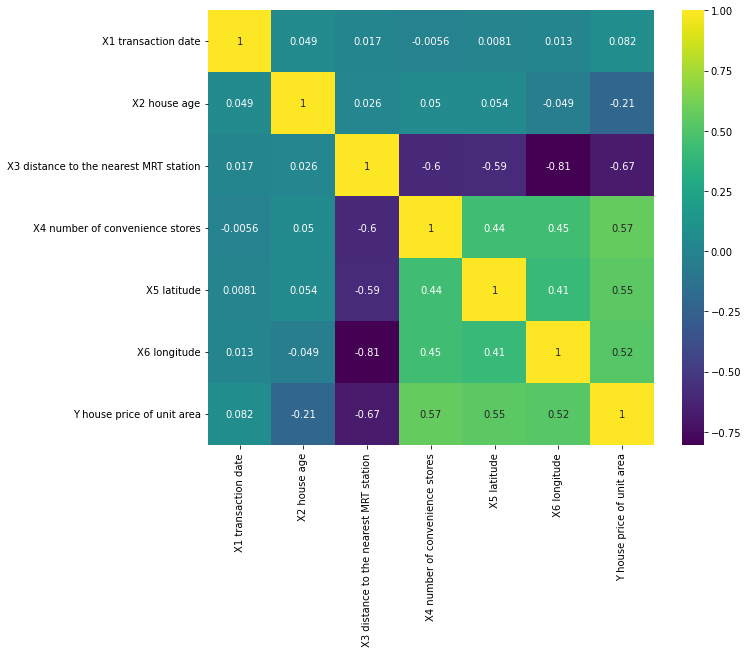

In [ ]:
# Plotting correlation graph

plt.figure(figsize=(10,8))
sns.heatmap(data=dataset.corr(), annot=True, cmap="viridis")

In [ ]:
# Splitting X (attributes) and Y (Output)  

X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1:]

In [ ]:
# Splitting Train and Test data

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

In [ ]:
# Normalizing the X_train and X_test

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
# Funciton to calculate partial derivate

def calc_partialderivate(total_samples,X,y_true,y_pred):
    w_grad = -(2/total_samples) * (X.T.dot(y_true-y_pred))
    b_grad = -(2/total_samples) * np.sum(y_true-y_pred)

    return w_grad,b_grad

In [ ]:
# Function to calculate gradient descent 

def gradient_descent(X,y_true,epochs,learning_rate):
    
    features = X.shape[1]           # No. of features
    
    w = np.ones(shape=(features))   # Initializing the weights with 1
    b = 0                           # Initializing the bais with 0
    total_samples = X.shape[0]      # Count of total number of samples
    
    list_cost = []                  # To store epoch,cost,R2,MSE for different iteration and parameters
    list_epoch = []
    r2_list = []
    r2 = []

    mse_list = []
    mse = []


    cost = 0
    
    for i in range(epochs):
        
        # calculating w1X1 + w2X2 + ... + Bias
 
        y_pred =  np.dot(w,X.T) + b 
        
        #  calling partial derivative function of w and b
        
        w_grad,b_grad = calc_partialderivate(total_samples,X,y_true,y_pred)
        
        # updating the w and b
        
        w = w - (learning_rate * w_grad)
        b = b - (learning_rate * b_grad)
        
        # Calculating cost

        cost = np.mean(np.square(y_true-y_pred))
        
        if  i % 100 == 0:
            list_cost.append(cost)
            list_epoch.append(i)
        r2_list.append(r2_score(y_true, y_pred) * 100)
        mse_list.append(mean_squared_error(y_true, y_pred))

    r2.append(np.mean(r2_list))
    mse.append(np.mean(mse_list))
            
    return w,b,cost,r2,mse

In [ ]:
# To store the results for each iteration
w_list = {}
b_list = {}
cost_values = {}
r2_sc = {}
mse_sc = {}

# Initializing the learning_rate and epochs
learning_rate = np.arange(0.01,0.1,0.01)
epochs = np.arange(4000,10000,1000)

# Calling gradient_descent for multiple epochs and learning_rates on Training data
for learn_rate in learning_rate:
  for epoch in epochs:
    w,b,cost,r22,mse22 = gradient_descent(X_train,np.array(Y_train).reshape(Y_train.shape[0],),epoch,learn_rate)
    w_list[(np.round(learn_rate,2),epoch)] = w
    b_list[(np.round(learn_rate,2),epoch)] = b
    cost_values[(np.round(learn_rate,2),epoch)] = cost
    r2_sc[(np.round(learn_rate,2),epoch)] = r22
    mse_sc[(np.round(learn_rate,2),epoch)] = mse22

print("----------Working on Training dataset----------")
print("List of Coefficients for each iteration: ", w_list)
print("List of Bias for each iteration: ", b_list)
print("List of Cost for each iteration: ", cost_values)
print("List of R2_Score for each iteration: ", r2_sc)
print("List of MSE for each iteration: ", mse_sc)

----------Working on Training dataset----------
List of Coefficients for each iteration:  {(0.01, 4000): array([ 1.20376247, -3.01237008, -5.44107256,  3.27059497,  2.95957313,
       -0.15516467]), (0.01, 5000): array([ 1.20376365, -3.01237009, -5.44109509,  3.2705899 ,  2.95956821,
       -0.155181  ]), (0.01, 6000): array([ 1.20376371, -3.01237009, -5.44109621,  3.27058965,  2.95956796,
       -0.15518181]), (0.01, 7000): array([ 1.20376371, -3.01237009, -5.44109627,  3.27058964,  2.95956795,
       -0.15518185]), (0.01, 8000): array([ 1.20376371, -3.01237009, -5.44109627,  3.27058964,  2.95956795,
       -0.15518185]), (0.01, 9000): array([ 1.20376371, -3.01237009, -5.44109627,  3.27058964,  2.95956795,
       -0.15518185]), (0.02, 4000): array([ 1.20376371, -3.01237009, -5.44109627,  3.27058964,  2.95956795,
       -0.15518185]), (0.02, 5000): array([ 1.20376371, -3.01237009, -5.44109627,  3.27058964,  2.95956795,
       -0.15518185]), (0.02, 6000): array([ 1.20376371, -3.01237009

In [ ]:
# Calling gradient_descent for multiple epochs and learning_rates on testing data

test_w_list = {}
test_b_list = {}
test_cost_values = {}
test_r2_sc = {}
test_mse_sc = {}

learning_rate = np.arange(0.01,0.1,0.01)
epochs = np.arange(4000,10000,1000)

for learn_rate in learning_rate:
  for epoch in epochs:
    w,b,cost,r22,mse22 = gradient_descent(X_test,np.array(Y_test).reshape(Y_test.shape[0],),epoch,learn_rate) 
    test_w_list[(np.round(learn_rate,2),epoch)] = w
    test_b_list[(np.round(learn_rate,2),epoch)] = b
    test_cost_values[(np.round(learn_rate,2),epoch)] = cost
    test_r2_sc[(np.round(learn_rate,2),epoch)] = r22
    test_mse_sc[(np.round(learn_rate,2),epoch)] = mse22

print("----------Working on Testing dataset----------")
print("List of Coefficients for each iteration: ", test_w_list)
print("List of Bias for each iteration: ", test_b_list)
print("List of Cost for each iteration: ", test_cost_values)
print("List of R2_Score for each iteration: ", test_r2_sc)
print("List of MSE for each iteration: ", test_mse_sc)

----------Working on Testing dataset----------
List of Coefficients for each iteration:  {(0.01, 4000): array([ 1.73125873, -3.57281798, -5.42706134,  3.76577524,  3.26171093,
       -0.43350269]), (0.01, 5000): array([ 1.73125597, -3.5728146 , -5.42709477,  3.76577351,  3.26169398,
       -0.4335245 ]), (0.01, 6000): array([ 1.73125579, -3.57281438, -5.42709694,  3.76577339,  3.26169288,
       -0.43352591]), (0.01, 7000): array([ 1.73125578, -3.57281437, -5.42709708,  3.76577339,  3.2616928 ,
       -0.43352601]), (0.01, 8000): array([ 1.73125578, -3.57281437, -5.42709709,  3.76577339,  3.2616928 ,
       -0.43352601]), (0.01, 9000): array([ 1.73125578, -3.57281437, -5.42709709,  3.76577339,  3.2616928 ,
       -0.43352601]), (0.02, 4000): array([ 1.73125578, -3.57281437, -5.42709709,  3.76577339,  3.2616928 ,
       -0.43352601]), (0.02, 5000): array([ 1.73125578, -3.57281437, -5.42709709,  3.76577339,  3.2616928 ,
       -0.43352601]), (0.02, 6000): array([ 1.73125578, -3.57281437,

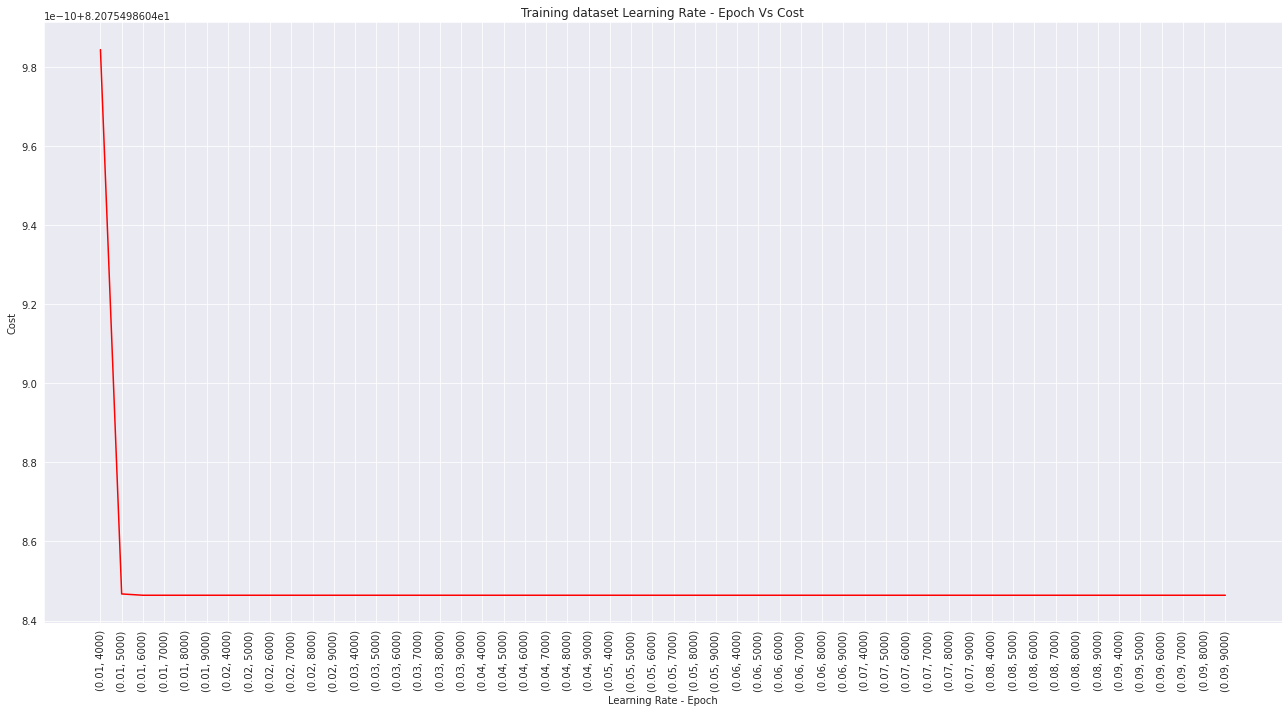

In [ ]:

sns.set_style("darkgrid")
plt.figure(figsize=(18,10))

plt.plot(np.arange(len(learning_rate) * len(epochs)),list(cost_values.values()), color="red")
plt.xticks(np.arange(len(learning_rate) * len(epochs)),labels=cost_values.keys(),rotation ='vertical')

plt.title("Training dataset Learning Rate - Epoch Vs Cost")

plt.xlabel("Learning Rate - Epoch")
plt.ylabel("Cost")
plt.tight_layout()
plt.draw()

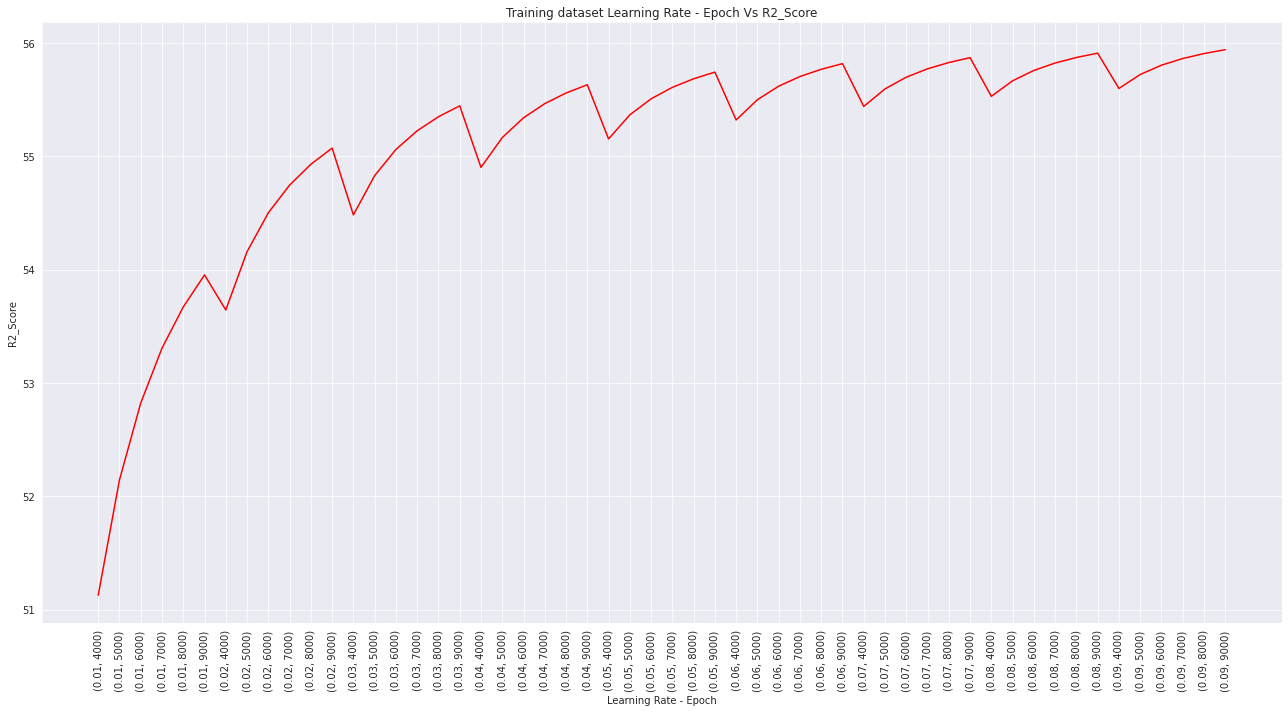

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,10))

plt.plot(np.arange(len(learning_rate) * len(epochs)),list(r2_sc.values()), color="red")
plt.xticks(np.arange(len(learning_rate) * len(epochs)),labels=r2_sc.keys(),rotation ='vertical')

plt.title("Training dataset Learning Rate - Epoch Vs R2_Score")

plt.xlabel("Learning Rate - Epoch")
plt.ylabel("R2_Score")

plt.tight_layout()
plt.draw()

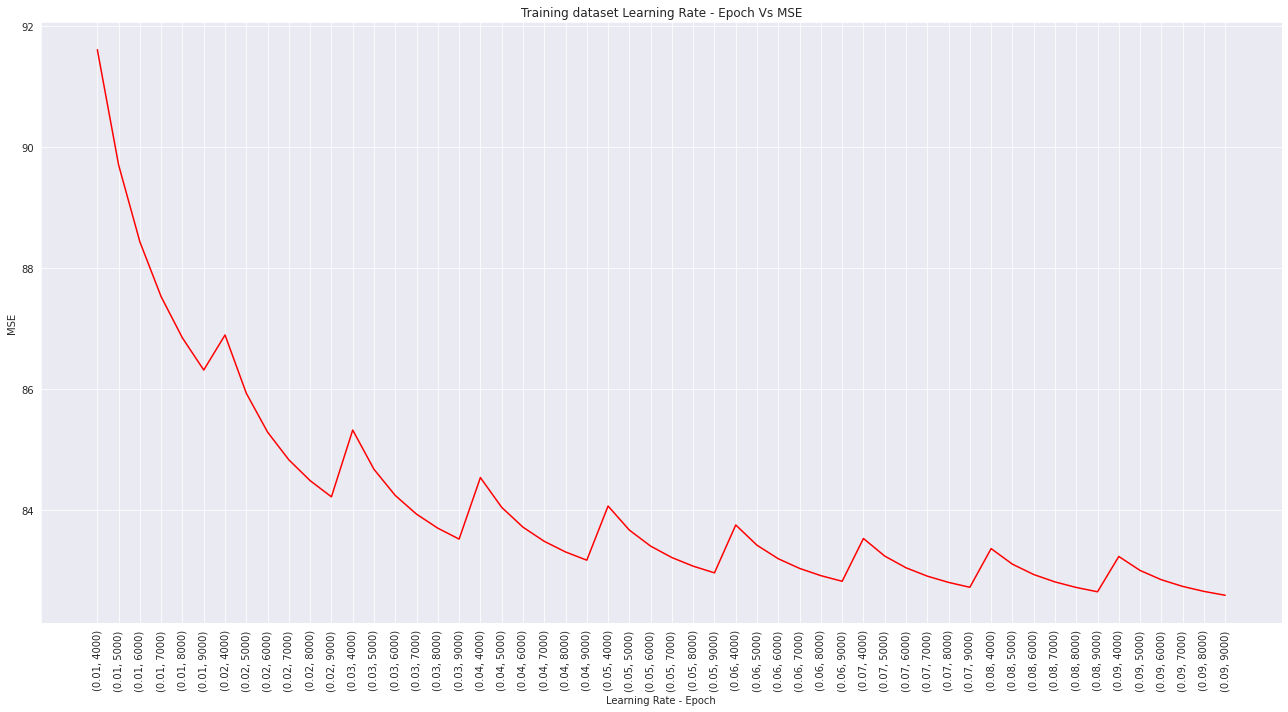

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,10))

plt.plot(np.arange(len(learning_rate) * len(epochs)),list(mse_sc.values()), color="red")
plt.xticks(np.arange(len(learning_rate) * len(epochs)),labels=mse_sc.keys(),rotation ='vertical')

plt.title("Training dataset Learning Rate - Epoch Vs MSE")

plt.xlabel("Learning Rate - Epoch")
plt.ylabel("MSE")

plt.tight_layout()
plt.draw()

In [ ]:
# Calculating Best value for Cost, R2_Score and MSE for training dataset

print("Minimum Cost Value on Training Data: ",min(cost_values.values()))
print("Maximum R2-Score Value on Training Data: ",max(r2_sc.values()))
print("Minimum MSE Value on Training Data: ",min(mse_sc.values()))

Minimum Cost Value on Training Data:  82.0754986048464
Maximum R2-Score Value on Training Data:  [55.93978422115538]
Minimum MSE Value on Training Data:  [82.58872630013092]


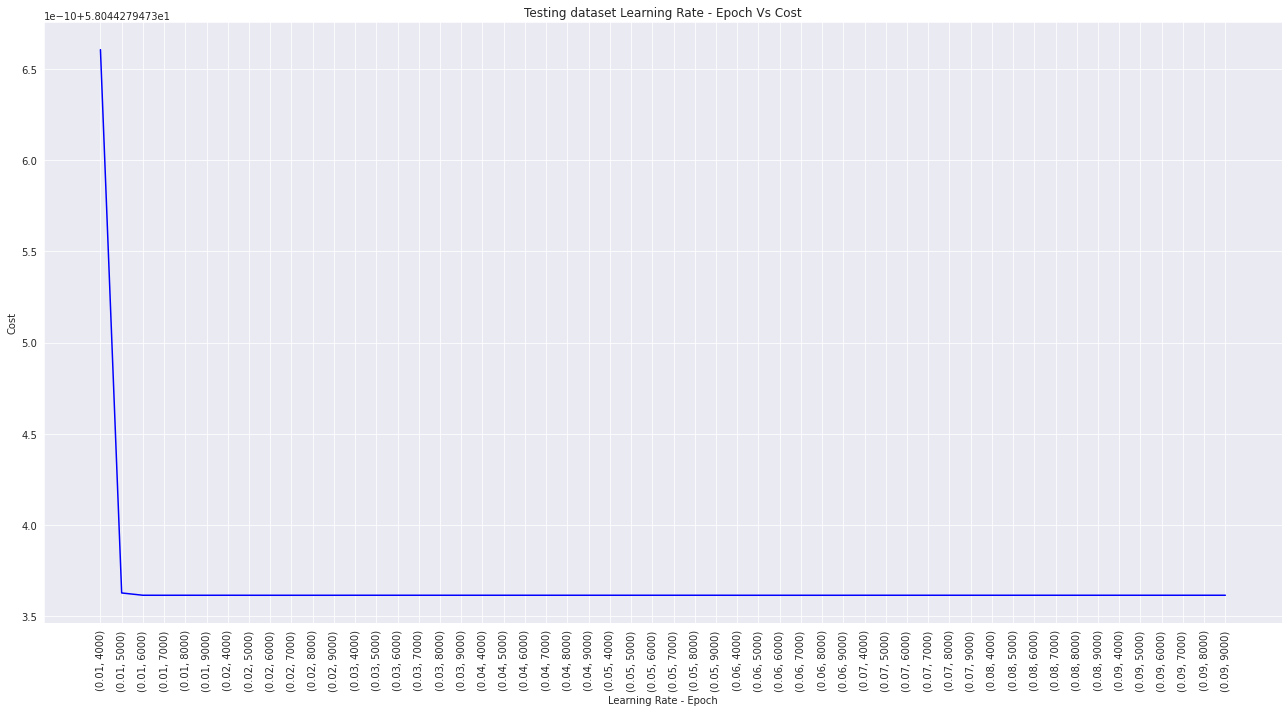

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,10))

plt.plot(np.arange(len(learning_rate) * len(epochs)),list(test_cost_values.values()), color="blue")
plt.xticks(np.arange(len(learning_rate) * len(epochs)),labels=test_cost_values.keys(),rotation ='vertical')

plt.title("Testing dataset Learning Rate - Epoch Vs Cost")
plt.xlabel("Learning Rate - Epoch")
plt.ylabel("Cost")

plt.tight_layout()
plt.draw()

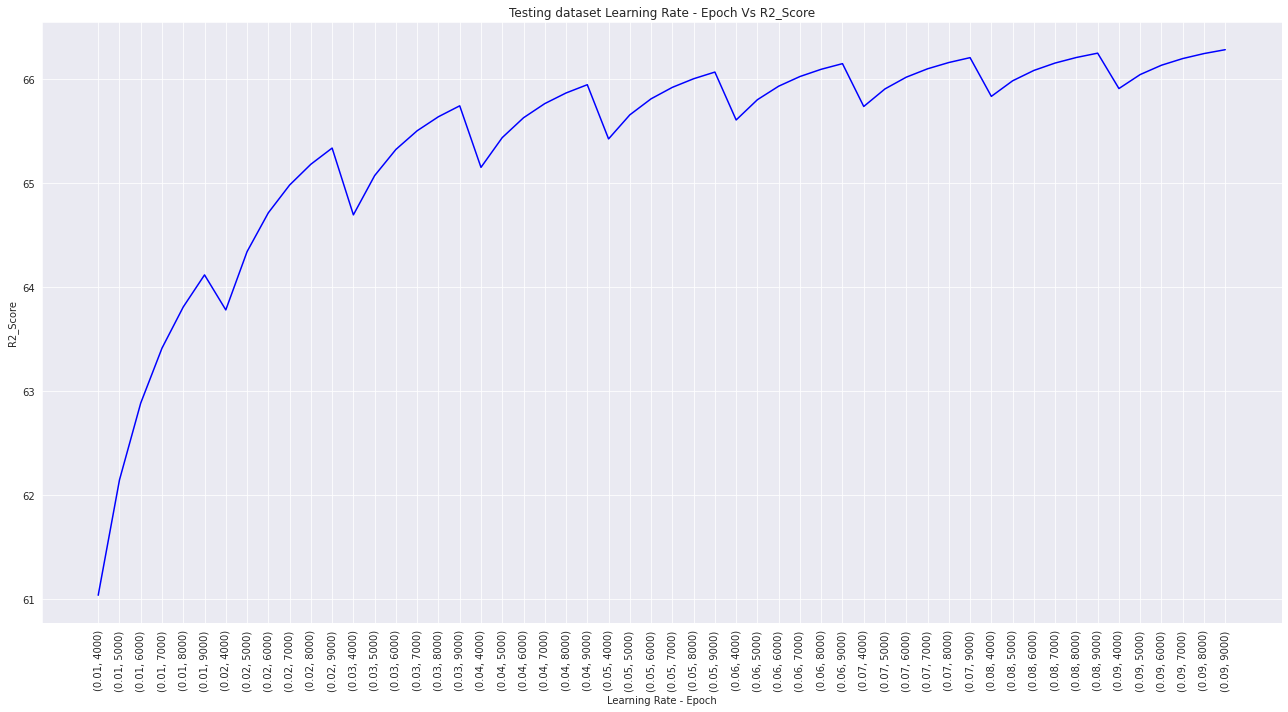

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,10))

plt.plot(np.arange(len(learning_rate) * len(epochs)),list(test_r2_sc.values()), color="blue")
plt.xticks(np.arange(len(learning_rate) * len(epochs)),labels=test_r2_sc.keys(),rotation ='vertical')

plt.title("Testing dataset Learning Rate - Epoch Vs R2_Score")

plt.xlabel("Learning Rate - Epoch")
plt.ylabel("R2_Score")

plt.tight_layout()
plt.draw()

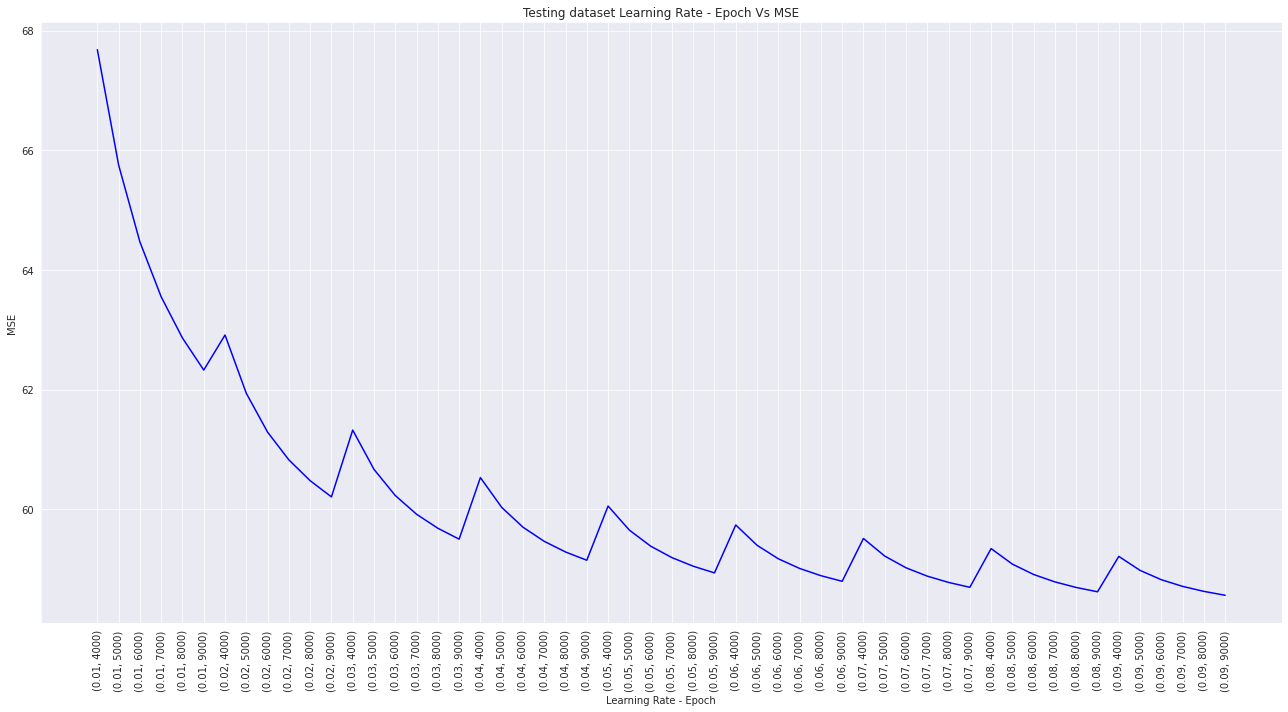

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,10))

plt.plot(np.arange(len(learning_rate) * len(epochs)),list(test_mse_sc.values()), color="blue")
plt.xticks(np.arange(len(learning_rate) * len(epochs)),labels=test_mse_sc.keys(),rotation =90)

plt.title("Testing dataset Learning Rate - Epoch Vs MSE")

plt.xlabel("Learning Rate - Epoch")
plt.ylabel("MSE")

plt.tight_layout()
plt.draw()

In [ ]:
# Calculating Best value Cost, R2_Score and MSE for testing dataset

print("Minimum Cost Value on Testing Data: ",min(test_cost_values.values()))
print("Maximum R2-Score Value on Testing Data: ",max(test_r2_sc.values()))
print("Minimum MSE Value on Testing Data: ",min(test_mse_sc.values()))

Minimum Cost Value on Testing Data:  58.044279473361414
Maximum R2-Score Value on Testing Data:  [66.28433114678081]
Minimum MSE Value on Testing Data:  [58.56378399712985]
